# Life Expectancy and Schooling
### An Analysis of Common Regression Methods Using WHO Data
![title](map.png)

### Introduction:

Development for accurate prediction models are at high demand. When dealing with continuous independent and dependent variables, models of regression are required.  However, there is a vast amount of regression techniques.  In this project, different forms of regression are analyzed.  Different types of errors are used to infer the best regression technique for this set of data.

In [1]:
 reg_models=[
'Linear Regression'
,'Polynomial Regression'
,'SVR'
,'Ridge Regression'
,'Lasso'
,'Nearest Neighbors'
,'Random Forest'
,'Guassian Process Regression'
]

## Loading All Packages:

In [21]:
from sklearn.linear_model import LogisticRegressionCV, LinearRegression, Ridge, Lasso
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#Sklearn Processing Packages:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import  mean_squared_error, mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import normalize

#Data Loading and Processing Packages:
import pandas as pd
import numpy as np


#Data Visualization Packages:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm as cm

## Importing and Preparing Data

In [68]:
   #Loading CSV File
df=pd.read_csv("life_exp.csv", sep=',')

   #Choosing our Features
df=df[['Country','Population','Schooling','Life expectancy ']]

   #Taking the mean values for each feature by country
df=df.groupby(['Country'])['Population','Schooling','Life expectancy '].mean()
   #Geting rid of NAN values
df = df[np.isfinite(df['Population'])]
df = df[np.isfinite(df['Schooling'])]
df = df[np.isfinite(df['Life expectancy '])]
countries=list(df.index)
   #Normalization of data
df_norm = pd.DataFrame(normalize(df[['Population','Schooling', 'Life expectancy ']],axis=0))
df_norm.columns=['Population','Schooling','Life Expectancy']
df_norm.index=countries


   #Printing Result
df=df_norm
df.head(10)

,Population,Schooling,Life Expectancy
Afghanistan,0.020677,0.055869,0.070198
Albania,0.001445,0.082570,0.090659
Algeria,0.044889,0.086482,0.088805
Angola,0.021039,0.054721,0.059130
Argentina,0.041719,0.112291,0.090659
Armenia,0.002105,0.080189,0.088541
Australia,0.009511,0.136313,0.098689
Austria,0.013425,0.104680,0.098289
Azerbaijan,0.004473,0.077213,0.085322
Bangladesh,0.089126,0.059143,0.083595


### Visualization

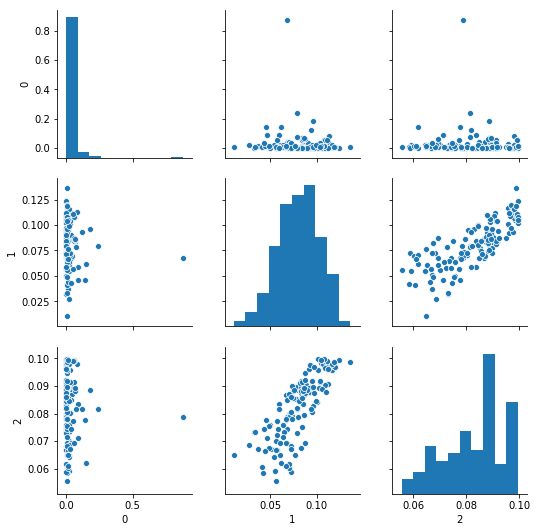

In [42]:
sns.pairplot(df)

## Test and Train Data

In [69]:
# STEP 1: split X and y into training and testing sets
X=df.drop(['Life Expectancy'],axis=1)
y=df['Life Expectancy']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=.15, random_state=4)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(121, 2) (121,)
(22, 2) (22,)


# Regression Techniques

## Linear Regression

### Hyper-parameter optimizer:

No Hyper-parameters to optimize

### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [70]:
clf = LinearRegression()

param_grid = {'fit_intercept':[True,False], 'normalize':[True,False]}
clf = GridSearchCV(clf, param_grid)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

linr_score=pd.DataFrame({'Linear': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
linr_score

,Linear
MSE,0.000051
MAE,0.005819
HUBER,0.000561
LOGCOSH,0.000561
R2,0.655919


___________________________

___________________________

## Standard Vector Regression


### Hyper-parameter optimizer:

kernel : Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to precompute the kernel matrix.

degree : Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.



### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [71]:
clf = SVR()

#For High Processing Computers:
#param_grid = {'degree': [2,3], 'kernel': ['rbf','poly']}
#clf = GridSearchCV(clf, param_grid)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

svr_score=pd.DataFrame({'Standard Vector': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
svr_score

,Standard Vector
MSE,1.569381e-04
MAE,1.146103e-02
HUBER,1.726319e-03
LOGCOSH,1.726247e-03
R2,-2.037173e+29


## Ridge Regression

### Hyper-parameter optimizer:

Alpha

### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [72]:
clf = Ridge()

param_grid = {'alpha': [.1,.2,.3,.5,.75,.9]}

clf = GridSearchCV(clf, param_grid)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

ridge_score=pd.DataFrame({'Ridge': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
ridge_score

,Ridge
MSE,0.000079
MAE,0.007362
HUBER,0.000866
LOGCOSH,0.000866
R2,-3.634252


## Lasso Regression


### Hyper-parameter optimizer:

Alpha

### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [73]:
clf = Lasso()

param_grid = {'alpha': [.05,.1,.15,.2,.3,.4,.5]}

clf = GridSearchCV(clf, param_grid)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

lasso_score=pd.DataFrame({'Lasso': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
lasso_score

,Lasso
MSE,0.000148
MAE,0.010451
HUBER,0.001628
LOGCOSH,0.001628
R2,0.000000


## Nearest Neighbors


### Hyper-parameter optimizer:

 - n_neighbors:  This is the number of neighbors you would like to use in your calculations. 
 - algorithm: There are different types of algorithmms.
 - weights: When summing the distance, you may want different weights for how close or far a distant neighbor may be. In some situations, uniform is not the best.
 - p:  This is a numeric representation of different distance metrics.  Usually, euclidean would suffice.



### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [74]:
clf = KNeighborsRegressor()

param_grid = {'n_neighbors': range(1,20), 'algorithm': ['auto','ball_tree','kd_tree', 'brute'], 'weights': ['uniform', 'distance'],'p': range(1,5)}

clf = GridSearchCV(clf, param_grid)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

nnr_score=pd.DataFrame({'K Nearest': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
nnr_score

,K Nearest
MSE,0.000054
MAE,0.005170
HUBER,0.000592
LOGCOSH,0.000592
R2,0.486203


## Random Forest Regressor


### Hyper-parameter optimizer:

 - n_estimators The number of trees in the forest.

 - criterion The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

 - min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:



### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [75]:
clf = RandomForestRegressor()

param_grid = {'criterion': ['mse', 'mae'], 'n_estimators': [2,3,4,5,7,10,50,100], 'min_samples_split': range(2,15)}

clf = GridSearchCV(clf, param_grid)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

rfr_score=pd.DataFrame({'Random Forest': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
rfr_score

,Random Forest
MSE,0.000063
MAE,0.005299
HUBER,0.000689
LOGCOSH,0.000689
R2,0.568482


## Gaussian Process Regressor


### Hyper-parameter optimizer:

 - n_estimators The number of trees in the forest.

 - criterion The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

 - min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:



### Error Calculations: MSE, MAE, Huber Loss, Log Cosh Loss, R^2

In [76]:
clf = GaussianProcessRegressor()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#Huber Loss and #Log Cosh Loss
def huber(true, pred, delta):
    loss = np.where(np.abs(true-pred) < delta , 0.5*((true-pred)**2), delta*np.abs(true - pred) - 0.5*(delta**2))
    return np.sum(loss)

def logcosh(true, pred):
    loss = np.log(np.cosh(pred - true))
    return np.sum(loss)

gpr_score=pd.DataFrame({'GPR': [mean_squared_error(y_pred, y_test)
          , mean_absolute_error(y_pred, y_test)
          , huber(y_pred, y_test,1)
          , logcosh(y_pred, y_test)
          , r2_score(y_pred, y_test)]},index=['MSE','MAE', 'HUBER', 'LOGCOSH','R2'])
gpr_score

,GPR
MSE,0.000058
MAE,0.006039
HUBER,0.000635
LOGCOSH,0.000635
R2,0.503285


In [77]:
regs_df=pd.concat([linr_score,svr_score,ridge_score, lasso_score, nnr_score, rfr_score, gpr_score],axis=1)
regs_df

,Linear,Standard Vector,Ridge,Lasso,K Nearest,Random Forest,GPR
MSE,0.000051,1.569381e-04,0.000079,0.000148,0.000054,0.000063,0.000058
MAE,0.005819,1.146103e-02,0.007362,0.010451,0.005170,0.005299,0.006039
HUBER,0.000561,1.726319e-03,0.000866,0.001628,0.000592,0.000689,0.000635
LOGCOSH,0.000561,1.726247e-03,0.000866,0.001628,0.000592,0.000689,0.000635
R2,0.655919,-2.037173e+29,-3.634252,0.000000,0.486203,0.568482,0.503285


<function matplotlib.pyplot.show(*args, **kw)>

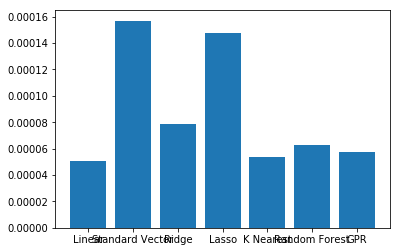

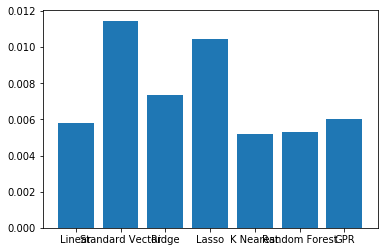

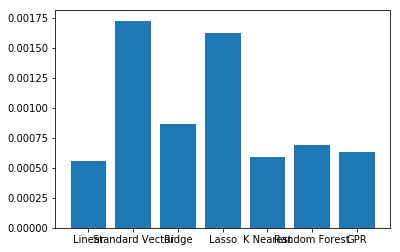

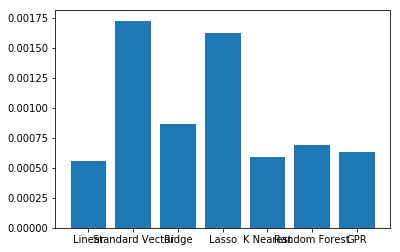

In [89]:
plt.figure(1)
plt.bar(clfs_df.columns,clfs_df.iloc[0])

plt.figure(2)
plt.bar(clfs_df.columns,clfs_df.iloc[1])

plt.figure(3)
plt.bar(clfs_df.columns,clfs_df.iloc[2])

plt.figure(4)
plt.bar(clfs_df.columns,clfs_df.iloc[3])

plt.show
